In [2]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
Rx = PolynomialRing(QQ, 'x')
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)

def divides(a,b):
    if mod(b,a)==0:return True
    return False

def ord_p_n_nonnegative(p,n):
    if (n in ZZ)==False:return(n,"is not an integer")
    if n==0:return Infinity
    if is_prime(p)==False:return(p," is not prime.")
    if gcd(p,n)==1:
        return 0
    
    for k in [0..n]:
        if divides(p^k,n)==True:
            if divides(p^(k+1),n)==False:
                return k
        
def ord_p(p,n):return ord_p_n_nonnegative(p,abs(n))


def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def H(n,m): # definition 8.1 (13aug21)
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    power = 1/(m-2)
    frac=numerator/denominator
    return ((S(frac^power)).O(n+1)).polynomial()

def H4(n,m): #per dfmn 8.2 in 2021 Integer paper
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()

def polynomialCoefficient(n,poly):
    return poly.list()[n]

def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent

def numericalfactor(poly):#new code for sage 9.6
    pol=D(poly)
    fp=pol.factor()
    lst=[R(factorpairToFactor(factorpair)) for factorpair in fp]
    prd=1
    for k in [0..len(lst)-1]:
        prd=prd*lst[k]
    return(pol/prd)


def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())

def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)

def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})

def deltaDiamond(n,m): #from 'conjecture 9.ipynb' (interpolation paper)
    return D(S(expand((H(n+2,m)^3)/J(n+2,m)))).truncate(n+1)

def deltaDiamondWt12(n,m):
    return D(S(expand((H4(n+2,m)^3)/J(n+2,m)))).truncate(n+1)

def deltaDiamondWt12Strike(n,m): #this is the cusp form from cn 9 of the interpolations paper
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=deltaDiamondWt12(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2
        
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr



print("ok1")

ok1


In [ ]:
output snipped
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile =  open('/Users/barrybrent/run29aug22no5.txt','rb') # deltaDiamondWt12Strike srs
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=200
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..597]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/30aug22no1.txt','wb') #deltaDiamondWt12Strike Euler exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [ ]:
# output snipped
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/30aug22no1.txt','rb') #deltaDiamondWt12Strike Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/30aug22no2.txt','wb') #deltaDiamondWt12Strike Euler exponent polynomials
for exponentnumber in [1..199]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        exponents=s[k][1]
        exponent=exponents[exponentnumber-1]
        data=data+[(m,exponent)]
    rl=Rx.lagrange_polynomial(data)
    polydata=polydata+[[exponentnumber,rl]] 
    finish = time.time()
    print([exponentnumber,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

In [2]:
import pickle
rfile = open('/Users/barrybrent/30aug22no2.txt','rb') #deltaDiamondWt12Strike Euler exponent polynomials
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

199


In [3]:
print(s[0])

[1, 24*x^3 - 48*x^2 - 64*x]


In [4]:
import pickle
rfile = open('/Users/barrybrent/30aug22no2.txt','rb') #deltaDiamondWt12Strike Euler exponent polynomials
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
x = PolynomialRing(RationalField(), 'x').gen()
f=s[0][1]
f.roots()

[(-1/3*sqrt(33) + 1, 1), (1/3*sqrt(33) + 1, 1), (0, 1)]

In [ ]:
#second entry in output pairs is the multiplicity.

In [13]:
import pickle 
rfile = open('/Users/barrybrent/30aug22no2.txt','rb') #deltaDiamondWt12Strike Euler exponent polynomials
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
x = PolynomialRing(CC, 'x').gen();
for n in [0..3]:
    f=s[n][1]
    print("==============================================================================")
    print("n: ",n)
    print("f:");print(f)
    fr=f.roots()
    print(fr[0][0])

n:  0
f:
24*x^3 - 48*x^2 - 64*x
-1/3*sqrt(33) + 1
n:  1
f:
-12*x^6 + 48*x^5 - 704*x^4 + 1332*x^3 + 2008*x^2 + 32*x
0
n:  2
f:
32*x^9 - 64*x^8 + 38912/27*x^7 - 12800/3*x^6 + 617984/27*x^5 - 142336/3*x^4 - 1970392/27*x^3 + 16*x^2 + 64/3*x
0
n:  3
f:
-6*x^12 + 48*x^11 - 41152/9*x^10 + 92096/9*x^9 - 2807872/27*x^8 + 2535680/9*x^7 - 20623198/27*x^6 + 16667432/9*x^5 + 78748448/27*x^4 - 672*x^3 - 992*x^2
0


f:
x + 1
roots&multiplicities:
[(-1.00000000000000, 1)]
(n,k):  (1, 0)
zro:
-1.00000000000000
-1.00000000000000
0.000000000000000
data:
[[-1.00000000000000, 0.000000000000000]]
plot:


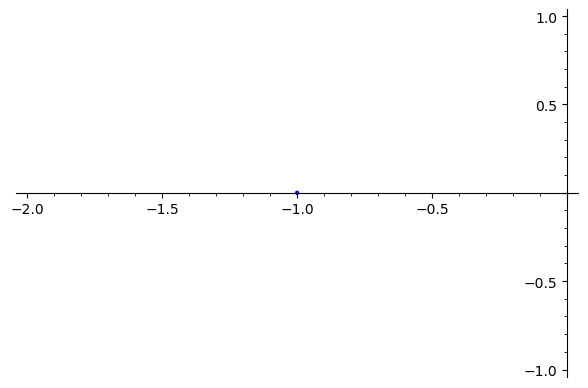

f:
x^2 + 1
roots&multiplicities:
[(-1.00000000000000*I, 1), (1.00000000000000*I, 1)]
(n,k):  (2, 0)
zro:
-1.00000000000000*I
0.000000000000000
-1.00000000000000
(n,k):  (2, 1)
zro:
1.00000000000000*I
0.000000000000000
1.00000000000000
data:
[[0.000000000000000, -1.00000000000000], [0.000000000000000, 1.00000000000000]]
plot:


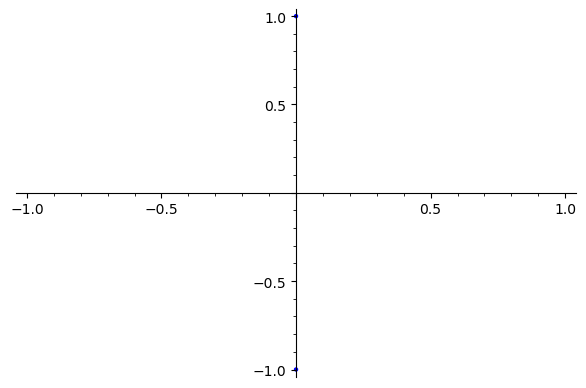

f:
x^3 + 1
roots&multiplicities:
[(-1.00000000000000, 1), (0.500000000000000 - 0.866025403784439*I, 1), (0.500000000000000 + 0.866025403784439*I, 1)]
(n,k):  (3, 0)
zro:
-1.00000000000000
-1.00000000000000
0.000000000000000
(n,k):  (3, 1)
zro:
0.500000000000000 - 0.866025403784439*I
0.500000000000000
-0.866025403784439
(n,k):  (3, 2)
zro:
0.500000000000000 + 0.866025403784439*I
0.500000000000000
0.866025403784439
data:
[[-1.00000000000000, 0.000000000000000], [0.500000000000000, -0.866025403784439], [0.500000000000000, 0.866025403784439]]
plot:


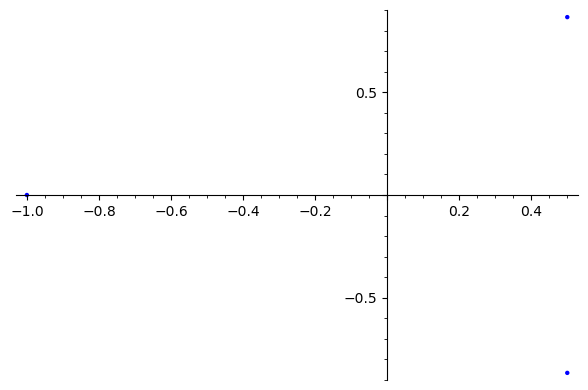

f:
x^4 + 1
roots&multiplicities:
[(-0.707106781186548 - 0.707106781186548*I, 1), (-0.707106781186548 + 0.707106781186548*I, 1), (0.707106781186548 - 0.707106781186548*I, 1), (0.707106781186548 + 0.707106781186548*I, 1)]
(n,k):  (4, 0)
zro:
-0.707106781186548 - 0.707106781186548*I
-0.707106781186548
-0.707106781186548
(n,k):  (4, 1)
zro:
-0.707106781186548 + 0.707106781186548*I
-0.707106781186548
0.707106781186548
(n,k):  (4, 2)
zro:
0.707106781186548 - 0.707106781186548*I
0.707106781186548
-0.707106781186548
(n,k):  (4, 3)
zro:
0.707106781186548 + 0.707106781186548*I
0.707106781186548
0.707106781186548
data:
[[-0.707106781186548, -0.707106781186548], [-0.707106781186548, 0.707106781186548], [0.707106781186548, -0.707106781186548], [0.707106781186548, 0.707106781186548]]
plot:


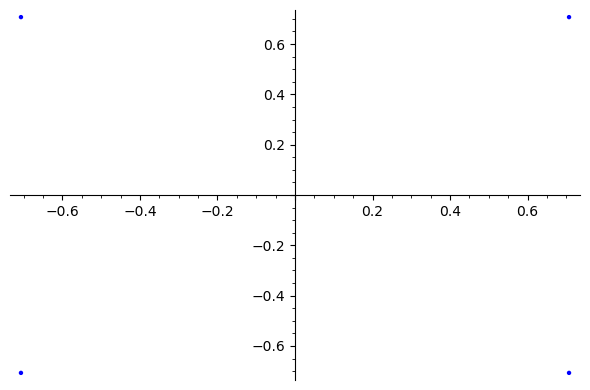

f:
x^5 + 1
roots&multiplicities:
[(-1.00000000000000, 1), (-0.309016994374947 - 0.951056516295154*I, 1), (-0.309016994374947 + 0.951056516295154*I, 1), (0.809016994374947 - 0.587785252292473*I, 1), (0.809016994374947 + 0.587785252292473*I, 1)]
(n,k):  (5, 0)
zro:
-1.00000000000000
-1.00000000000000
0.000000000000000
(n,k):  (5, 1)
zro:
-0.309016994374947 - 0.951056516295154*I
-0.309016994374947
-0.951056516295154
(n,k):  (5, 2)
zro:
-0.309016994374947 + 0.951056516295154*I
-0.309016994374947
0.951056516295154
(n,k):  (5, 3)
zro:
0.809016994374947 - 0.587785252292473*I
0.809016994374947
-0.587785252292473
(n,k):  (5, 4)
zro:
0.809016994374947 + 0.587785252292473*I
0.809016994374947
0.587785252292473
data:
[[-1.00000000000000, 0.000000000000000], [-0.309016994374947, -0.951056516295154], [-0.309016994374947, 0.951056516295154], [0.809016994374947, -0.587785252292473], [0.809016994374947, 0.587785252292473]]
plot:


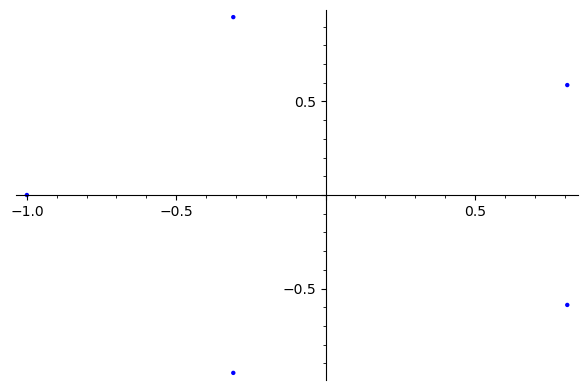

f:
x^6 + 1
roots&multiplicities:
[(-0.866025403784439 - 0.500000000000000*I, 1), (-0.866025403784439 + 0.500000000000000*I, 1), (-1.00000000000000*I, 1), (1.00000000000000*I, 1), (0.866025403784439 - 0.500000000000000*I, 1), (0.866025403784439 + 0.500000000000000*I, 1)]
(n,k):  (6, 0)
zro:
-0.866025403784439 - 0.500000000000000*I
-0.866025403784439
-0.500000000000000
(n,k):  (6, 1)
zro:
-0.866025403784439 + 0.500000000000000*I
-0.866025403784439
0.500000000000000
(n,k):  (6, 2)
zro:
-1.00000000000000*I
0.000000000000000
-1.00000000000000
(n,k):  (6, 3)
zro:
1.00000000000000*I
0.000000000000000
1.00000000000000
(n,k):  (6, 4)
zro:
0.866025403784439 - 0.500000000000000*I
0.866025403784439
-0.500000000000000
(n,k):  (6, 5)
zro:
0.866025403784439 + 0.500000000000000*I
0.866025403784439
0.500000000000000
data:
[[-0.866025403784439, -0.500000000000000], [-0.866025403784439, 0.500000000000000], [0.000000000000000, -1.00000000000000], [0.000000000000000, 1.00000000000000], [0.866025403784439, 

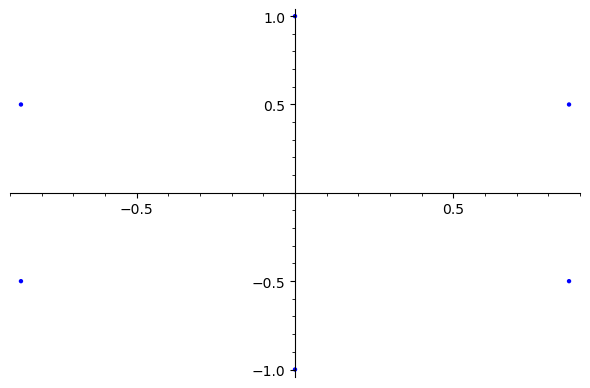

f:
x^7 + 1
roots&multiplicities:
[(-1.00000000000000, 1), (-0.623489801858733 - 0.781831482468030*I, 1), (-0.623489801858733 + 0.781831482468030*I, 1), (0.222520933956314 - 0.974927912181824*I, 1), (0.222520933956314 + 0.974927912181824*I, 1), (0.900968867902419 - 0.433883739117558*I, 1), (0.900968867902419 + 0.433883739117558*I, 1)]
(n,k):  (7, 0)
zro:
-1.00000000000000
-1.00000000000000
0.000000000000000
(n,k):  (7, 1)
zro:
-0.623489801858733 - 0.781831482468030*I
-0.623489801858733
-0.781831482468030
(n,k):  (7, 2)
zro:
-0.623489801858733 + 0.781831482468030*I
-0.623489801858733
0.781831482468030
(n,k):  (7, 3)
zro:
0.222520933956314 - 0.974927912181824*I
0.222520933956314
-0.974927912181824
(n,k):  (7, 4)
zro:
0.222520933956314 + 0.974927912181824*I
0.222520933956314
0.974927912181824
(n,k):  (7, 5)
zro:
0.900968867902419 - 0.433883739117558*I
0.900968867902419
-0.433883739117558
(n,k):  (7, 6)
zro:
0.900968867902419 + 0.433883739117558*I
0.900968867902419
0.433883739117558
data:
[

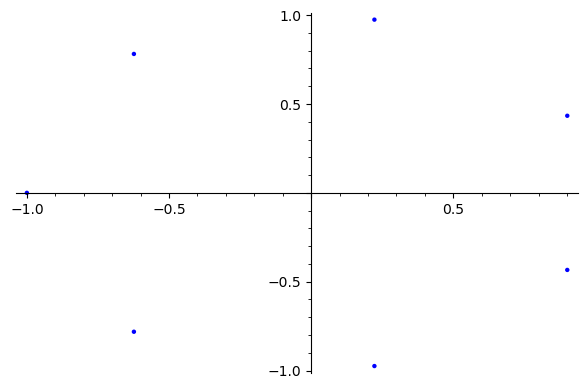

In [37]:
import pickle 
rfile = open('/Users/barrybrent/30aug22no2.txt','rb') #deltaDiamondWt12Strike Euler exponent polynomials
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
for n in [1..7]:
    f=R(x^n+1)
    print("==============================================================================")
    
    print("f:");print(f)
    fr=f.roots(CC)
    print("roots&multiplicities:")
    print(fr)
    lnth=len(fr)
    data=[]
    for k in [0..lnth-1]:
        print("(n,k): ",(n,k))
        zro=fr[k][0]
        print("zro:")
        print(zro)
        rz=RR(real(zro))
        iz=RR(imaginary(zro))
        print(rz)
        print(iz)
        data=data+[[rz,iz]]
    print("data:")   
    print(data)
    print("plot:")
    show(list_plot(data))

exponent:  1
polynomial:  24*x^3 - 48*x^2 - 64*x
roots:
[(-0.914854215512676, 1), (0.000000000000000, 1), (2.91485421551268, 1)]


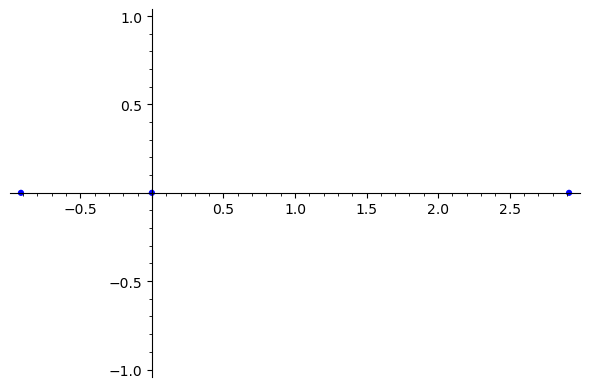

In [3]:
import pickle
rfile = open('/Users/barrybrent/30aug22no2.txt','rb') #deltaDiamondWt12Strike Euler exponent polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..0]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    print("polynomial: ",poly)
    poly=R(poly)
    pr=poly.roots(CC)
    print("roots:")
    print(pr)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        root=pr[j][0] #pr[j] is a pair (root,multiplicity)
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='blue',size=20)
    show(rootplot)

exponent:  199
polynomial:  4800/199*x^597 - 9600/199*x^596 + 76938127979632486958152406904124755414373244588400312786510430064277348370746244065329029267963418240047320580994975628078754964792901442240794032706597404309947412618858221469105443051334192898698865748951365281945679791878105945848112540125217782434151004010120182784/6099203099941694417019902327775555923284352613481774952971352409530435787425581320348225465943675430309398925223467972637877703499976363626987581979124635808531671077835585217119335568206965311338722995701026735002373510841128692840674621717095405971869923828125*x^595 - 1157643593311973453295512126181382182364341461736973710451581385455436140618479872948147070902314323351012861362029704631205237344447978957895645825056033155027007222251664882176790964977325965817989462322552730843232190829248208109408147315156149891507414515471473664/30649261808752233251356293104399778508966596047647110316438956831811235112691363418835303848963193117132657915695818957979284942

roots:
[(-0.999563847093334, 1), (-0.0196392133267366, 1), (0.000000000000000, 1), (0.0196399764891219, 1), (3.00000000000000, 1), (-25.0757100234845 - 178.208821126577*I, 1), (-25.0757100234845 + 178.208821126577*I, 1), (-18.9946648512205 - 442.757601328000*I, 1), (-18.9946648512205 + 442.757601328000*I, 1), (-13.5998210002545 - 113.294985130825*I, 1), (-13.5998210002545 + 113.294985130825*I, 1), (-9.92385762839843 - 18.7246916882776*I, 1), (-9.92385762839843 + 18.7246916882776*I, 1), (-9.91852021629115 - 23.3909330964550*I, 1), (-9.91852021629115 + 23.3909330964550*I, 1), (-9.81631837623948 - 17.0428582057612*I, 1), (-9.81631837623948 + 17.0428582057612*I, 1), (-9.74200542721238 - 25.8097402355820*I, 1), (-9.74200542721238 + 25.8097402355820*I, 1), (-9.58706037346380 - 21.1257898767450*I, 1), (-9.58706037346380 + 21.1257898767450*I, 1), (-9.51355427953712 - 15.6073161848955*I, 1), (-9.51355427953712 + 15.6073161848955*I, 1), (-9.28809289496795 - 20.5728233466584*I, 1), (-9.2880928949

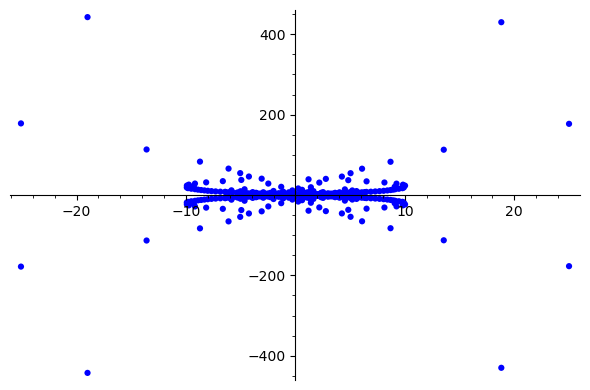

In [4]:
 import pickle
rfile = open('/Users/barrybrent/30aug22no2.txt','rb') #deltaDiamondWt12Strike Euler exponent polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
last=len(s)-1
for k in [last..last]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    print("polynomial: ",poly)
    poly=R(poly)
    pr=poly.roots(CC)
    print("roots:")
    print(pr)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        root=pr[j][0] #pr[j] is a pair (root,multiplicity)
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='blue',size=20)
    show(rootplot)